In [1]:
COMSOL="$OUTPUT_PATH/COMSOL56/Python/MPh"
VTK_TOOLS="$OUTPUT_PATH/COMSOL56/Python/Tools"

import sys;

sys.path.append(COMSOL)
import mph;

sys.path.append(VTK_TOOLS)
import vtk_tools

CASE ="$OUTPUT_PATH/COMSOL56/CASES/"
mph_name = "%s/headphone_artificial_ear.mph" % CASE
mph_props = ['T','V']

import vtk
import numpy as np 
import pandas as pd


DEBUG:mph:Using default configuration.


-----------------------
+Running 'ipykernel_launcher'... 


In [2]:
client   = mph.start(cores=1)
model    = client.load(mph_name)
mph_name = mph_name.replace(".mph","")

INFO:mph:Starting local Comsol session.
DEBUG:mph:Checking installation folder "/Applications/COMSOL56/Multiphysics".
DEBUG:mph:Reported version info is "[comsol] CONFIG_FILE /Applications/COMSOL56/Multiphysics/bin/maci64/comsolcompile.ini
COMSOL Multiphysics 5.6.0.401".
DEBUG:mph:Assigned name "5.6" to this installation.
DEBUG:mph:No folder "Multiphysics" in "COMSOL56.app".
INFO:mph:Starting external server process.
INFO:mph:Server restricted to 1 processor core.


Version: '[comsol] CONFIG_FILE /Applications/COMSOL56/Multiphysics/bin/maci64/comsolcompile.ini
COMSOL Multiphysics 5.6.0.401' 


INFO:mph:Server listening on port 64744.
DEBUG:mph:JPype version is 1.3.0.
INFO:mph:Starting Java virtual machine.
DEBUG:mph:JVM arguments: ['/Applications/COMSOL56/Multiphysics/java/maci64/jre/Contents/Home/lib/server/libjvm.dylib']
INFO:mph:Java virtual machine has started.
INFO:mph:Connecting to server "localhost" at port 64744.
INFO:mph:Running on 1 processor core.
INFO:mph:Loading model "headphone_artificial_ear2.mph".
INFO:mph:Finished loading model.


In [3]:
mph.tree(model)

headphone_artificial_ear2
├─ parameters
│  ├─ Model parameters
│  ├─ Perforated plates parameters
│  └─ Thiele-Small Parameters
├─ functions
├─ components
│  └─ Component 1
├─ geometries
│  └─ Geometry 1
│     ├─ Import 1
│     └─ Form Union
├─ views
│  └─ View 1
├─ selections
│  ├─ Foam
│  ├─ Moving membrane positive
│  ├─ Moving membrane negative
│  ├─ Interior sound hard boundary
│  ├─ Eardrum
│  ├─ Skin with PML
│  ├─ Skin without PML
│  ├─ PML sides
│  ├─ PML corners
│  ├─ PML caps
│  ├─ Perforated plate 1
│  ├─ Perforated plate 2
│  ├─ Perforated plate 3
│  ├─ All Domains
│  ├─ Plastic casing
│  ├─ Air with PML
│  ├─ Air without PML
│  ├─ Air boundaries
│  ├─ Moving membrane
│  ├─ Meshed domains without PML and foam
│  └─ PML
├─ coordinates
│  ├─ Boundary System 1
│  ├─ Perfectly Matched Layer 1
│  ├─ Perfectly Matched Layer 2
│  └─ Perfectly Matched Layer 3
├─ variables
│  └─ Model variables
├─ couplings
│  └─ Integration on the moving membrane
├─ physics
├─ multiphysics
├─ mate

In [4]:
SelectionList = model.java.selection()

Selections = []
for S in SelectionList :
    selections = {"name":S.name(), "type":S.getType(), "dim":S.dimension()[0], "entities":S.entities(), "input":S.inputEntities()}
    Selections.append(selections)


In [5]:
import pandas as pd
df = pd.DataFrame(Selections).astype({"name":str,"type":str})
print(df)

                                   name        type  dim  \
0                                  Foam    Explicit    3   
1              Moving membrane positive    Explicit    2   
2              Moving membrane negative    Explicit    2   
3          Interior sound hard boundary    Explicit    2   
4                               Eardrum    Explicit    2   
5                         Skin with PML    Explicit    2   
6                      Skin without PML    Explicit    2   
7                             PML sides    Explicit    3   
8                           PML corners    Explicit    3   
9                              PML caps    Explicit    3   
10                   Perforated plate 1    Explicit    2   
11                   Perforated plate 2    Explicit    2   
12                   Perforated plate 3    Explicit    2   
13                          All Domains    Explicit    3   
14                       Plastic casing    Explicit    3   
15                         Air with PML 

In [6]:
dim = 2
grouped = df.groupby(['dim']).get_group(dim)
print( grouped )

                            name      type  dim  \
1       Moving membrane positive  Explicit    2   
2       Moving membrane negative  Explicit    2   
3   Interior sound hard boundary  Explicit    2   
4                        Eardrum  Explicit    2   
5                  Skin with PML  Explicit    2   
6               Skin without PML  Explicit    2   
10            Perforated plate 1  Explicit    2   
11            Perforated plate 2  Explicit    2   
12            Perforated plate 3  Explicit    2   
17                Air boundaries     Union    2   
18               Moving membrane     Union    2   

                                             entities  \
1                                [150, 152, 156, 158]   
2                                [151, 153, 157, 159]   
3   [126, 127, 128, 129, 146, 147, 148, 149, 154, ...   
4                                               [333]   
5   [289, 316, 317, 318, 319, 320, 321, 322, 323, ...   
6   [289, 317, 318, 319, 320, 321, 322, 324, 

In [7]:
Stls = [] 
for i,(index,row) in enumerate(grouped.iterrows()):
    name = row['name']
    name = name.replace(" ","_").lower() + ".stl"
    #print(name)

    model.java.component('comp1').geom('geom1').export().setSTLFormat('text')
    model.java.component('comp1').geom('geom1').export().selection().init(dim)
    for j in row['entities'] :
      model.java.component('comp1').geom('geom1').export().selection().add("imp1",j)

    path = str(model.java.component('comp1').geom('geom1').export(name))
   
    print("path(%d):'%s'" % (i,path))
    Stls.append(path)
    

path(0):'$OUTPUT_PATH/COMSOL56/CASES/moving_membrane_positive.stl'
path(1):'$OUTPUT_PATH/COMSOL56/CASES/moving_membrane_negative.stl'
path(2):'$OUTPUT_PATH/COMSOL56/CASES/interior_sound_hard_boundary.stl'
path(3):'$OUTPUT_PATH/COMSOL56/CASES/eardrum.stl'
path(4):'$OUTPUT_PATH/COMSOL56/CASES/skin_with_pml.stl'
path(5):'$OUTPUT_PATH/COMSOL56/CASES/skin_without_pml.stl'
path(6):'$OUTPUT_PATH/COMSOL56/CASES/perforated_plate_1.stl'
path(7):'$OUTPUT_PATH/COMSOL56/CASES/perforated_plate_2.stl'
path(8):'$OUTPUT_PATH/COMSOL56/CASES/perforated_plate_3.stl'
path(9):'$OUTPUT_PATH/COMSOL56/CASES/air_boundaries.stl'
path(10):'$OUTPUT_PATH/COMSOL56/CASES/moving_membrane.stl'


In [11]:
from mpl_toolkits import mplot3d
from matplotlib import pyplot

vtp = vtk_tools.Reader(Stls[9])
Coords = vtk_tools.GetCoords(vtp)
CellVertices,_ = vtk_tools.GetCellsList(vtp)
CellVertices = np.array(CellVertices)

cell = CellVertices[:,:]
face = Coords[cell,:]
collection = mplot3d.art3d.Poly3DCollection(face, alpha=0.5)


	[Reader] File:'$OUTPUT_PATH/COMSOL56/CASES/air_boundaries.stl' ClassName:'vtkPolyData' 
	[GetCellsList] Found Types:  ['VTK_TRIANGLE']


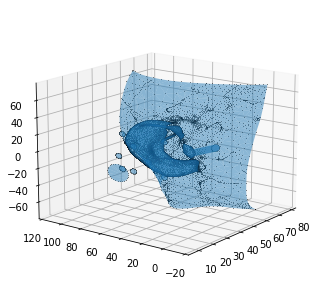

In [12]:
figure = pyplot.figure()
axes = mplot3d.Axes3D(figure)
axes.scatter(Coords[:,0], Coords[:,1], Coords[:,2], color='black',marker=',',lw=0, s=1, alpha=0.5)
axes.add_collection3d( collection )
axes.view_init(15,-143)
pyplot.show()

In [14]:
import os
print("PWD:'{}' ".format(os.getcwd()))  

PWD:'$OUTPUT_PATH/COMSOL/Python/Test04_1' 
